In [38]:
import pickle
from collections import defaultdict
import numpy as np
from PIL import Image

In [79]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [36]:
path = '/home/julien/crops_frcnn/'

In [4]:
with open("results2.txt", "rb") as file:
    results_flwing = pickle.load(file)

with open("results3.txt", "rb") as file:
    results_not_flwing = pickle.load(file)

In [11]:
results_flwing

[['0002288b-3b3e-59a1-83b6-a3528d9dc889.jpg', 307, 102, 588, 499],
 ['0002288b-3b3e-59a1-83b6-a3528d9dc889.jpg', 358, 166, 524, 473],
 ['0002288b-3b3e-59a1-83b6-a3528d9dc889.jpg', 396, 243, 473, 422],
 ['00029f7b-9ed4-5f54-8cf6-5cb077db0e36.jpg', 0, 16, 360, 409],
 ['00029f7b-9ed4-5f54-8cf6-5cb077db0e36.jpg', 409, 245, 753, 491],
 ['000401ed-c11b-5875-9f36-43654f525391.jpg', 563, 512, 1305, 947],
 ['000401ed-c11b-5875-9f36-43654f525391.jpg', 691, 230, 1254, 691],
 ['00093c31-c931-58ba-a655-570dcea4335c.jpg', 0, 64, 217, 473],
 ['00093c31-c931-58ba-a655-570dcea4335c.jpg', 204, 153, 640, 460],
 ['000a06dd-81d3-53be-b7bf-9a83a849a438.jpg', 268, 204, 499, 384],
 ['000b87cb-b5b5-5b40-be2a-46e7ab189c3a.jpg', 384, 307, 768, 691],
 ['000bfef6-0ac8-52a8-a266-1ee9a9d1785f.jpg', 268, 140, 512, 332],
 ['000cc95c-bf73-54ab-9f89-2c237424b721.jpg', 371, 217, 524, 384],
 ['000cc95c-bf73-54ab-9f89-2c237424b721.jpg', 358, 115, 512, 294],
 ['000d01e4-a9b2-56ce-aa91-2e4d37e287a0.jpg', 819, 230, 1100, 563]

In [16]:
l_one = [2,5,7,9,3]
l_two = [-1,3,-9,11,4]
np.minimum(l_one, l_two)

array([-1,  3, -9,  9,  3])

In [73]:
dic_flwing = defaultdict(lambda: [np.inf, np.inf, np.inf, np.inf])
dic_not_flwing = defaultdict(lambda: [np.inf, np.inf, np.inf, np.inf])

In [74]:
for result in results_flwing:
    #bb = np.array(result[1:])
    #dic_flwing[result[0]] = np.minimum(dic_flwing[result[0]], np.maximum(bb, 0, bb))
    dic_flwing[result[0]] = np.minimum(dic_flwing[result[0]], result[1:])
    
for result in results_not_flwing:
    #bb = np.array(result[1:])
    #dic_not_flwing[result[0]] = np.minimum(dic_not_flwing[result[0]], np.maximum(bb, 0, bb))
    dic_not_flwing[result[0]] = np.minimum(dic_not_flwing[result[0]], result[1:])

In [61]:
crop_test = dic_flwing['000d01e4-a9b2-56ce-aa91-2e4d37e287a0.jpg']

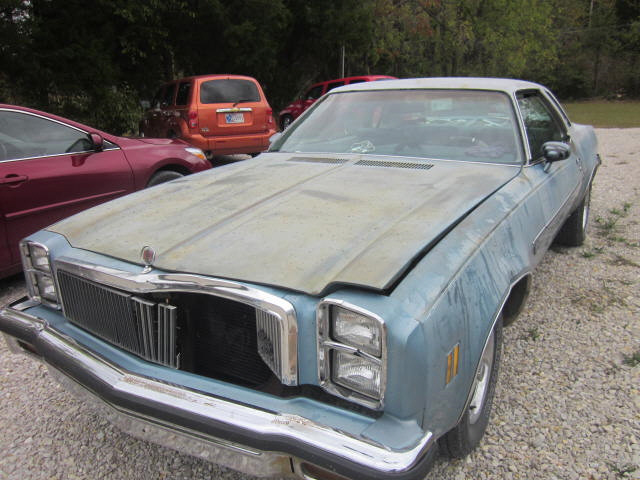

In [75]:
img = Image.open(path+'flwing/'+'00100887-8dad-5efa-8084-1ac0f9b5b757.jpg')
img
#img.crop(dic_flwing['000401ed-c11b-5875-9f36-43654f525391.jpg'])
#img.crop((crop_test[1], crop_test[0], crop_test[3], crop_test[2]))
#img.crop((-50,50,100,200))

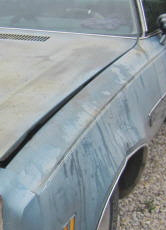

In [76]:
img.crop(dic_flwing['00100887-8dad-5efa-8084-1ac0f9b5b757.jpg'])

In [77]:
img.size

(640, 480)

In [80]:
for filename in dic_flwing.keys():
    img = Image.open(path+'flwing/'+filename)
    img_cropped = img.crop(dic_flwing[filename])
    img_cropped.save(path+'flwing/'+filename)

/home/julien/miniconda3/envs/project/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:790: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn("Image appears to be a malformed MPO file, it will be "


In [81]:
for filename in dic_not_flwing.keys():
    img = Image.open(path+'not_flwing/'+filename)
    img_cropped = img.crop(dic_not_flwing[filename])
    img_cropped.save(path+'not_flwing/'+filename)

/home/julien/miniconda3/envs/project/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:790: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn("Image appears to be a malformed MPO file, it will be "


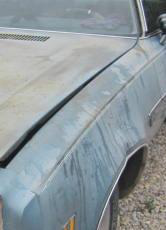

In [82]:
img = Image.open(path+'flwing/'+'00100887-8dad-5efa-8084-1ac0f9b5b757.jpg')
img